<a href="https://colab.research.google.com/github/Monochrome901/BCS_secy_task/blob/main/BCS_secy_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><h1>Neural Network</h1></center> #

## Components of neural netork ###
1. __Input__- This is the data we give to our model, this is in form of numbers which is inputed in form of arrays/tensors.
2. __Neurons__- This artificial neuron takes all the inputs, aggregates them, and then based on a function gives the output of the neuron. Network of these neurons are interconnected to form the input, hidden and output layers.
3. __Weights and biases__- Weights are the real values that are associated with each feature which tells the importance of that feature in predicting the final value.
4. __Activation Function__
5. __Learning rate__-It can control the pace of the weight update.

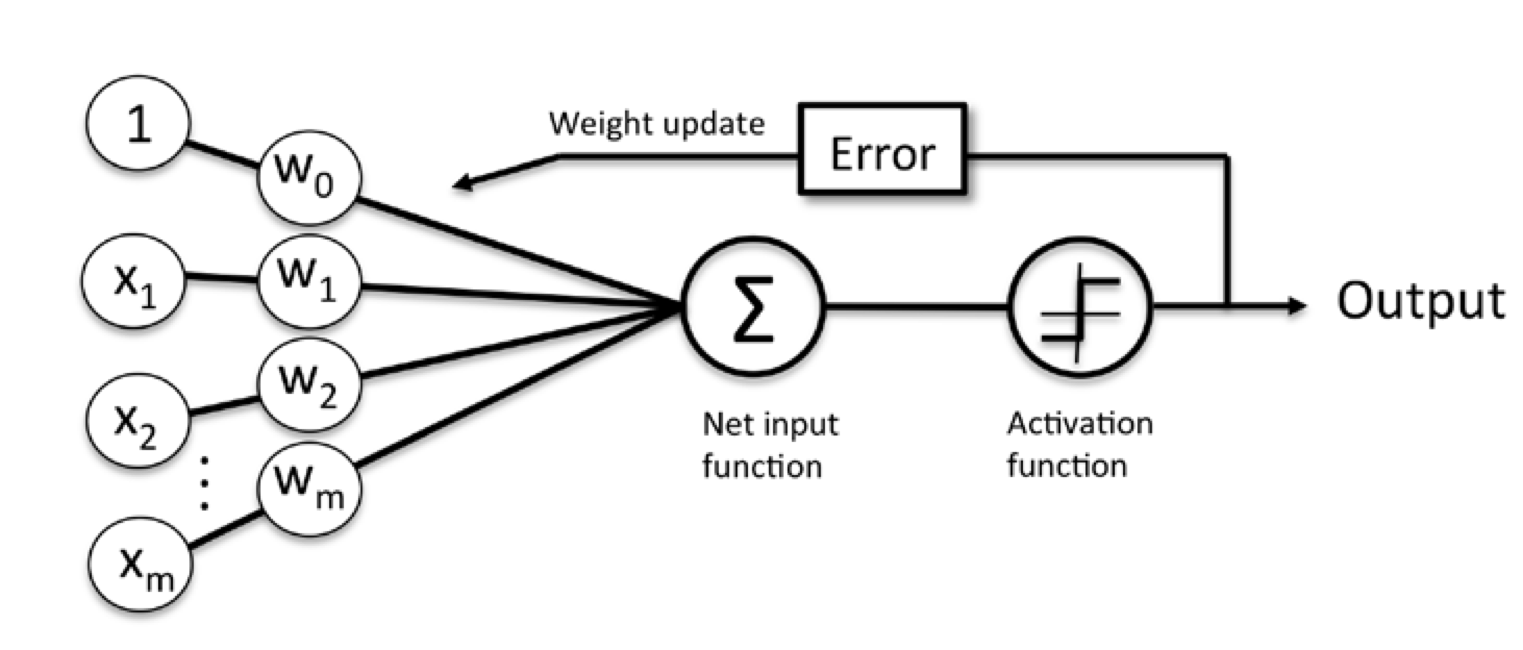

###Above is a photo of perceptron###

In [367]:
#importing all the libraries that we need to make a neural network
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import math

In [382]:
#taking an mnist dataset from kaggle
mnist_data=pd.read_csv(r"/content/mnist_test.csv")
mnist_data.shape

(10000, 785)

In [383]:
mnist_data=np.array(mnist_data)
rows,columns=mnist_data.shape
np.random.shuffle(mnist_data)#shuffling data

#training data
train=mnist_data[0:8000].T
y_train=train[0]
x_train=train[1:columns]
x_train=x_train/255

#testing data
test=mnist_data[8000:rows].T
y_test=test[0]
x_test=test[1:columns]
x_test=x_test/255
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((784, 8000), (8000,), (784, 2000), (2000,))

In [384]:
#activation functions
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))

def sigmoid_deriv(x):
  return -1.0*np.exp(-x)/(sigmoid(x)*sigmoid(x))

def relu(x):
  return np.maximum(x,0)

def relu_deriv(x):
  return x>0

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

In [385]:
def random_weights_biases():
  w_1=np.random.rand(100,784)-0.5
  b_1=np.random.rand(100,1)-0.5
  w_2=np.random.rand(100,100)-0.5
  b_2=np.random.rand(100,1)-0.5
  w_3=np.random.rand(10,100)-0.5
  b_3=np.random.rand(10,1)-0.5
  return w_1,b_1,w_2,b_2,w_3,b_3

In [386]:
#forward propagation
def forward_propagation(x,w_1,b_1,w_2,b_2,w_3,b_3):#considering only one hidden layer
  z_1=np.dot(w_1,x)+b_1
  y_1=relu(z_1)
  z_2=np.dot(w_2,y_1)+b_2
  y_2=relu(z_2)
  z_3=np.dot(w_3,y_2)+b_3
  y_3=softmax(z_3)
  return z_1,y_1,z_2,y_2,z_3,y_3

In [387]:
def hot_encoding(y):
    hot_encoded_y = np.zeros((y.size, y.max()+1))
    hot_encoded_y[np.arange(y.size), y] = 1
    hot_encoded_y = hot_encoded_y.T
    return hot_encoded_y


In [388]:
#backward propagation
def back_propagation(x,y,w_1,w_2,w_3,z_1,y_1,z_2,y_2,z_3,y_3):
  cost_func=y_3-hot_encoding(y)
  dw_3=np.dot(cost_func,y_2.T)/rows
  db_3=np.sum(z_2)/rows

  dz_2=np.dot(w_3.T,cost_func)*relu_deriv(z_2)
  dw_2=np.dot(z_2,y_1.T)/rows
  db_2=np.sum(z_2)/rows

  dz_1=np.dot(w_2.T,dz_2)*relu_deriv(z_1)
  dw_1=np.dot(z_1,x.T)/rows
  db_1=np.sum(z_1)/rows

  return dw_3,db_3,dw_2,db_2,dw_1,db_1

In [389]:
#updating weights and biases
def update_w_b(lr,w_1,b_1,w_2,b_2,w_3,b_3,dw_1,db_1,dw_2,db_2,dw_3,db_3):
  w_1=w_1-lr*dw_1
  b_1=b_1-lr*db_1
  w_2=w_2-lr*dw_2
  b_2=b_2-lr*db_2
  w_3=w_3-lr*dw_3
  b_3=b_3-lr*db_3
  return w_1,b_1,w_2,b_2,w_3,b_3

In [390]:
def model(x,y,lr,epochs):
  w_1,b_1,w_2,b_2,w_3,b_3 = random_weights_biases()
  for i in range(epochs):
    z_1,y_1,z_2,y_2,z_3,y_3 = forward_propagation(x,w_1,b_1,w_2,b_2,w_3,b_3)
    dw_3,db_3,dw_2,db_2,dw_1,db_1 = back_propagation(x,y,w_1,w_2,w_3,z_1,y_1,z_2,y_2,z_3,y_3)
    w_1,b_1,w_2,b_2,w_3,b_3 =  update_w_b(lr,w_1,b_1,w_2,b_2,w_3,b_3,dw_1,db_1,dw_2,db_2,dw_3,db_3)
    print(np.argmax(y_3,0),y)
    print(np.sum(np.argmax(y_3,0)==y)/y.size)
  return w_1,b_1,w_2,b_2,w_3,b_3

In [392]:
w_1,b_1,w_2,b_2,w_3,b_3 = model(x_train,y_train,0.01,100)

[6 3 1 ... 0 8 6] [1 5 6 ... 0 3 0]
0.101
[8 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.116625
[6 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.116375
[6 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.111
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.109375
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.10775
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.105
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.1025
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.101625
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.1
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.1
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.100625
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.100375
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.101375
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.10175
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.10225
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.103625
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.10375
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.104125
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.104875
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.104375
[3 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0.1045
[6 3 1 ... 0 2 0] [1 5 6 ... 0 3 0]
0

In [393]:
#above part was training of data, now its time to test the data
def prediction(x,w_1,b_1,w_2,b_2,w_3,b_3):
  z_1=np.dot(w_1,x)+b_1
  y_1=relu(z_1)
  z_2=np.dot(w_2,y_1)+b_2
  y_2=relu(z_2)
  z_3=np.dot(w_3,y_2)+b_3
  y_3=softmax(z_3)
  return np.argmax(y_3,0)


In [394]:

def test_prediction(w_1, b_1, w_2, b_2, w_3, b_3, x, y):
  predictions = prediction(x, w_1, b_1, w_2, b_2,w_3,b_3)
  print(predictions,y)
  print(np.sum(predictions==y)/y.size)
    


In [395]:
test_prediction(w_1, b_1, w_2, b_2, w_3, b_3, x_test, y_test)

[3 0 1 ... 8 0 9] [4 4 5 ... 6 2 0]
0.1055


# ***Note*** - #
I don't know why the accuracy is so low, even though when doing the same with tensorflow, accuracy is great. If given chance I would definetly figure it out till interview.

##__Making a Neural Network with Tensorflow__##

In [222]:
#taking an mnist dataset from kaggle
mnist_data=pd.read_csv(r"/content/mnist_test.csv")
mnist_data.shape

(10000, 785)

In [223]:
x=mnist_data.drop("label",axis=1)
y=mnist_data["label"]
y,x

(0       7
 1       2
 2       1
 3       0
 4       4
        ..
 9995    2
 9996    3
 9997    4
 9998    5
 9999    6
 Name: label, Length: 10000, dtype: int64,
       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
 0       0    0    0    0    0    0    0    0    0     0  ...      0      0   
 1       0    0    0    0    0    0    0    0    0     0  ...      0      0   
 2       0    0    0    0    0    0    0    0    0     0  ...      0      0   
 3       0    0    0    0    0    0    0    0    0     0  ...      0      0   
 4       0    0    0    0    0    0    0    0    0     0  ...      0      0   
 ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
 9995    0    0    0    0    0    0    0    0    0     0  ...      0      0   
 9996    0    0    0    0    0    0    0    0    0     0  ...      0      0   
 9997    0    0    0    0    0    0    0    0    0     0  ...      0      0   
 9998    0    0    0    0    0    0    0    0 

In [224]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(8000, 784)

In [29]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(10,activation="softmax")
])

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_1.fit(x_train,y_train,epochs=100,verbose=0)

In [225]:
model_1.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 2.5304 - accuracy: 0.9485


[2.530369281768799, 0.9484999775886536]

Our model above has shown __95% accuracy__, hence i believe it is a good model.